In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np

In [2]:
sms = pd.read_csv('spam.csv', encoding = 'latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:

sms.columns = ['label','message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms['label'] = sms['label'].map({'ham': 0, 'spam': 1})


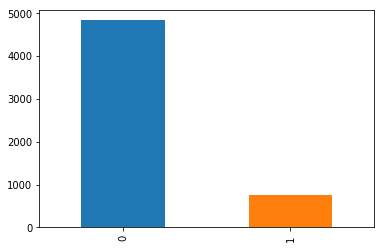

In [6]:
sms.label.value_counts().plot.bar()
plt.show()

In [7]:
#nltk.download('stopwords')
def pre_process_message(message, lower_case = True, stem = True, stop_words = True):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    #print(words)
    if stop_words:
        sw = stopwords.words('english')
        words = [w for w in words if w not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
        #print(words)
    return " ".join(words)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X = sms['message'].apply(pre_process_message)
y = sms['label']

cv = CountVectorizer()
X = cv.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [10]:

clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
clf.score(X_test,y_test)


0.9784725781650435

In [12]:
y_pred = clf.predict(X_test)


In [13]:
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1685
          1       0.92      0.92      0.92       266

avg / total       0.98      0.98      0.98      1951



In [17]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test,y_pred)
print(cm)

Predicted  False  True  __all__
Actual                         
False        521    85      606
True          90    16      106
__all__      611   101      712


In [18]:
#pip install pandas_ml